In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [13]:
shedfun=tf.keras.optimizers.schedules.ExponentialDecay(0.001,3000,0.94,True)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
________________________________________________

In [23]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=shedfun), metrics=['accuracy'])

In [17]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 61s 157ms/step - loss: 0.5095 - accuracy: 0.7501 - val_loss: 0.4412 - val_accuracy: 0.8161
Epoch 2/10
391/391 [==============================] - 61s 157ms/step - loss: 0.4106 - accuracy: 0.8243 - val_loss: 0.6199 - val_accuracy: 0.7592
Epoch 3/10
391/391 [==============================] - 61s 156ms/step - loss: 0.3922 - accuracy: 0.8323 - val_loss: 0.5088 - val_accuracy: 0.7516
Epoch 4/10
391/391 [==============================] - 61s 157ms/step - loss: 0.3145 - accuracy: 0.8759 - val_loss: 0.4380 - val_accuracy: 0.8237
Epoch 5/10
391/391 [==============================] - 62s 158ms/step - loss: 0.2490 - accuracy: 0.9055 - val_loss: 0.4197 - val_accuracy: 0.8313
Epoch 6/10
391/391 [==============================] - 61s 156ms/step - loss: 0.2108 - accuracy: 0.9226 - val_loss: 0.4566 - val_accuracy: 0.8281
Epoch 7/10
391/391 [==============================] - 61s 156ms/step - loss: 0.2163 - accuracy: 0.9170 - val_loss: 0.4935 - val_ac

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

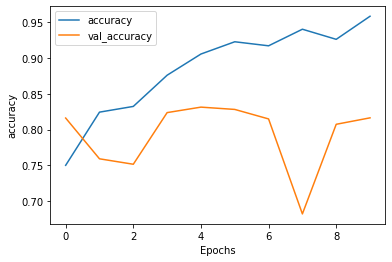

In [18]:
plot_graphs(history, 'accuracy')

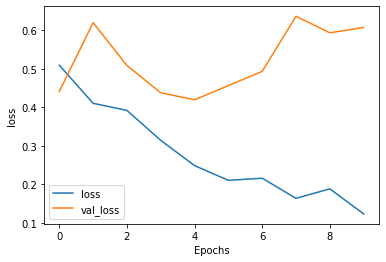

In [19]:
plot_graphs(history, 'loss')